In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from pandas_datareader import data as web
import matplotlib.pyplot as plt
import seaborn as sb
import sys

sys.path.append("..")

import utils.getStockData as stockData

# Stocks Overall

In [2]:
stocks = ["AAPL", "CAH", "CMCSA", "DISH", "GOOG", "HSY", "JNJ", "JPM", "K", "MA", "NFLX", "UL", "WBA"]
startDate = '2017-11-30'
endDate = '2022-03-18'

In [3]:
data = stockData.getMultipleStocks(stocks, startDate, endDate)
data.columns =  stocks
data = data[1:]
initialPrices = data.iloc[0]

In [4]:
stockAdjustedPrice = data.copy(deep=True)


for i, value in data.iterrows():
    # print(i)
    # print(value)
    # print()
    for key,initialPrice in initialPrices.items():
        # row.append(value[key]/initialPrice)
        stockAdjustedPrice.loc[i][key] = value[key]/initialPrice

#stockAdjustedPrice

## Tech Companies

In [5]:
stocks_tech = ["AAPL", "GOOG"]

tech = stockData.getMultipleStocks(stocks_tech, startDate, endDate)
tech.columns =  stocks_tech
tech = tech[1:]
tech.describe()

,AAPL,GOOG
count,52.000000,52.000000
mean,87.777622,1625.775895
std,44.107831,638.094638
min,38.541548,1035.696187
25%,47.816039,1147.479051
50%,68.613987,1322.573313
75%,127.957500,2061.972795
max,173.552727,2948.650484


## Finance Companies

In [6]:
stocks_fin = ["JPM", "MA"]

fin = stockData.getMultipleStocks(stocks_fin, startDate, endDate)
fin.columns =  stocks_fin
fin = fin[1:]
fin.describe()

,JPM,MA
count,52.000000,52.000000
mean,122.829863,280.695840
std,22.596873,69.101327
min,91.523499,150.442499
25%,107.370822,214.583753
50%,113.701079,282.825001
75%,137.947969,339.013864
max,168.229048,381.090953


## F&B Companies

In [7]:
stocks_fb = ["UL", "K", "HSY"]

fb = stockData.getMultipleStocks(stocks_fb, startDate, endDate)
fb.columns =  stocks_fb
fb = fb[1:]
fb.describe()

,UL,K,HSY
count,52.000000,52.000000,52.000000
mean,56.322318,63.686150,139.954198
std,3.566063,4.117641,30.853115
min,45.467143,55.174000,91.807727
25%,53.428564,61.921591,110.179003
50%,55.827857,63.719226,144.028408
75%,59.267228,66.050136,155.872100
max,62.436364,72.985789,207.187145


## Entertainment Companies

In [8]:
stocks_ent = ["CMCSA", "NFLX", "DISH"]

ent = stockData.getMultipleStocks(stocks_ent, startDate, endDate)
ent.columns =  stocks_ent
ent = ent[1:]
ent.describe()

,CMCSA,NFLX,DISH
count,52.000000,52.000000,52.000000
mean,44.079582,408.781000,35.055876
std,7.465438,111.473552,5.619099
min,31.800454,187.854501,22.120952
25%,37.611171,330.106186,31.794796
50%,43.659524,370.067068,34.259156
75%,49.643289,500.369775,37.926052
max,59.072273,667.524286,49.111000


## Health Companies

In [9]:
stocks_health= ["JNJ", "CAH", "WBA"]

health = stockData.getMultipleStocks(stocks_health, startDate, endDate)
health.columns =  stocks_health
health = health[1:]
health.describe()

,JNJ,CAH,WBA
count,52.000000,52.000000,52.000000
mean,146.169971,53.044780,55.291503
std,14.638695,5.649883,11.516231
min,122.277619,43.570454,35.901428
25%,134.425376,49.196692,47.762481
50%,143.976645,52.745952,52.956273
75%,161.727519,54.462468,64.552976
max,175.105001,70.193334,81.820476


--> Each industries have companies whose stocks lie in different ranges, so these are suitable stocks that can help create not too biased portfolios

# Time series graphs

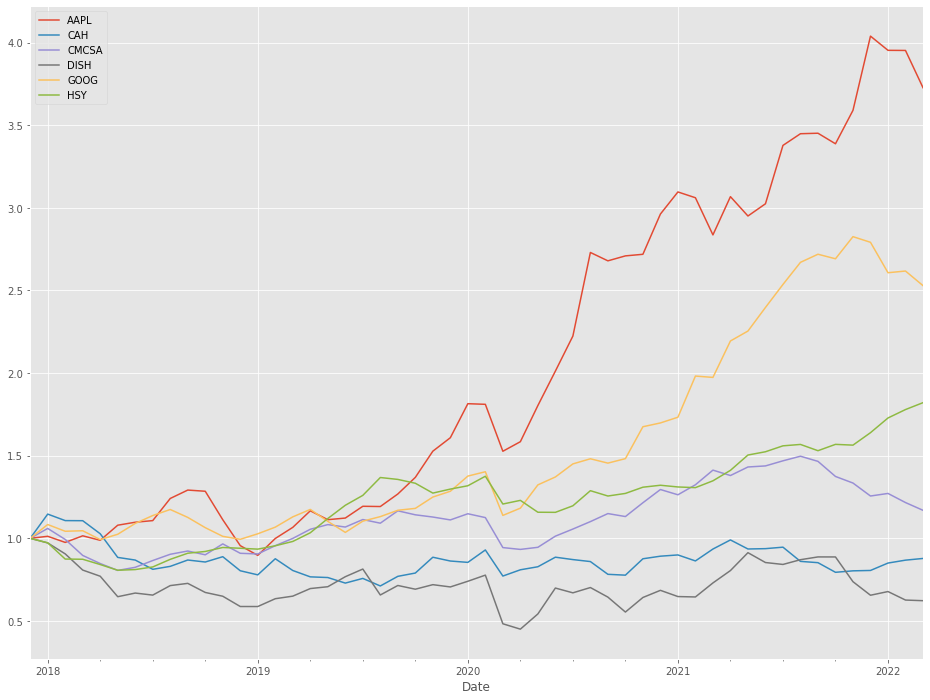

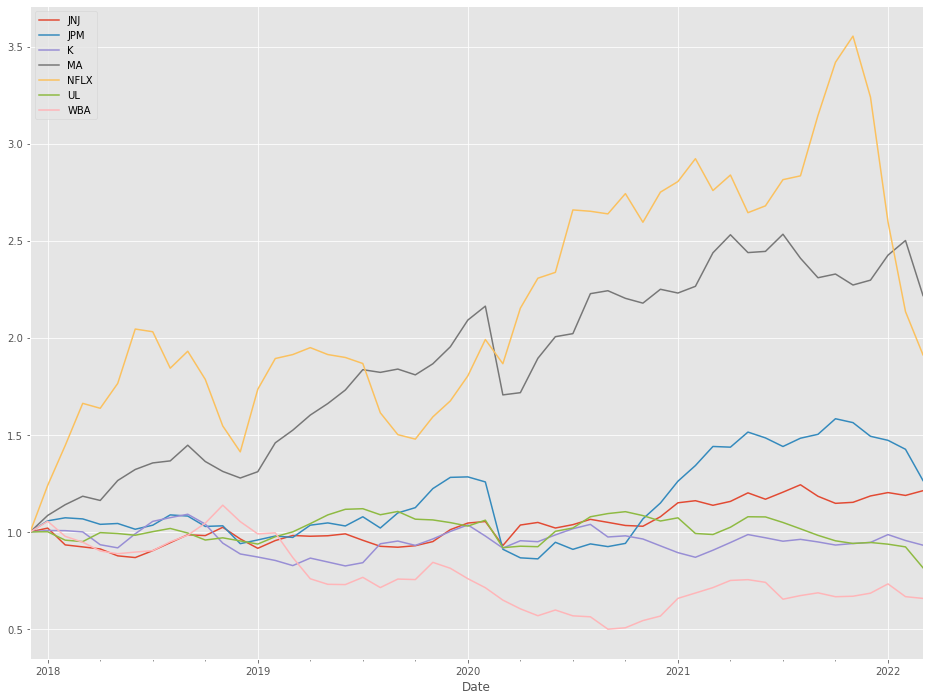

In [35]:
plt.style.use('ggplot')
stockAdjustedPrice.iloc[:,:6].plot(figsize=(16, 12))
stockAdjustedPrice.iloc[:,6:].plot(figsize=(16, 12))
plt.show()

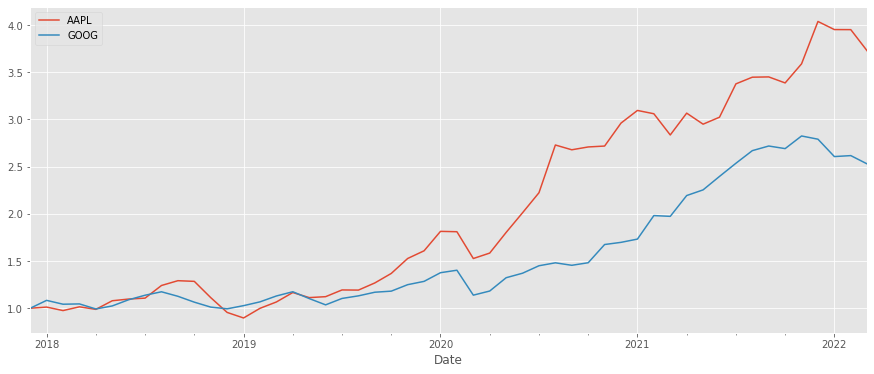

In [29]:
stockAdjustedPrice['AAPL'].plot(figsize=[15,6], label="AAPL")
stockAdjustedPrice['GOOG'].plot(figsize=[15,6], label="GOOG")
plt.legend(loc="upper left")


--> The tech industries seem to do best in terms of stocks (1st is Google, 2nd is Apple). There's a high chance that tech companies will take more proportion than others in our portfolios

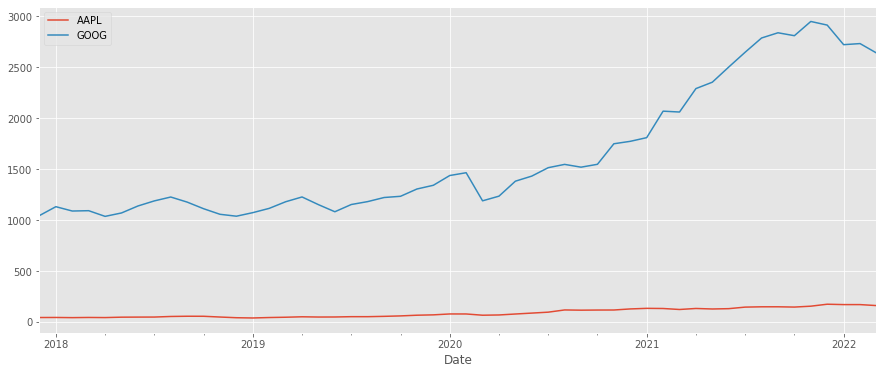

In [12]:
tech.plot(figsize=(15, 6))
plt.show()

--> Google observes tremendous growth while Apple have a more stable growth

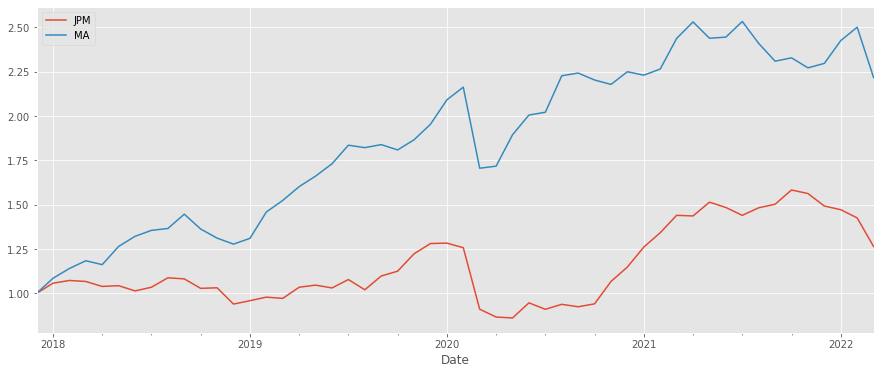

In [30]:
stockAdjustedPrice['JPM'].plot(figsize=[15,6], label="JPM")
stockAdjustedPrice['MA'].plot(figsize=[15,6], label="MA")
plt.legend(loc="upper left")

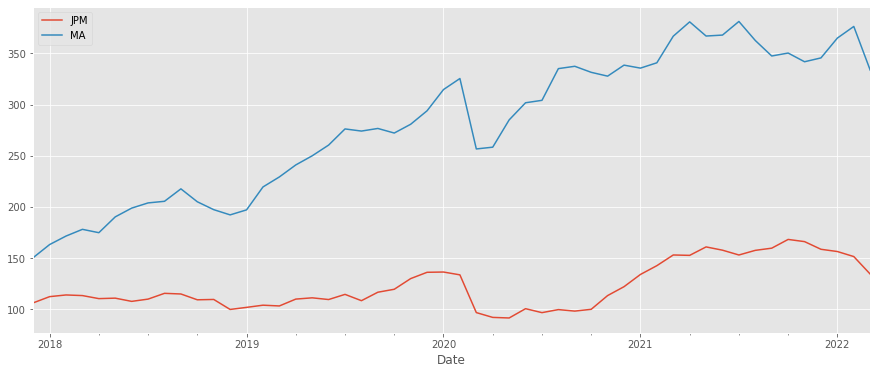

In [13]:
fin.plot(figsize=(15, 6))
plt.show()

--> Both JPMorgan and Mastercard experience increasing stock price

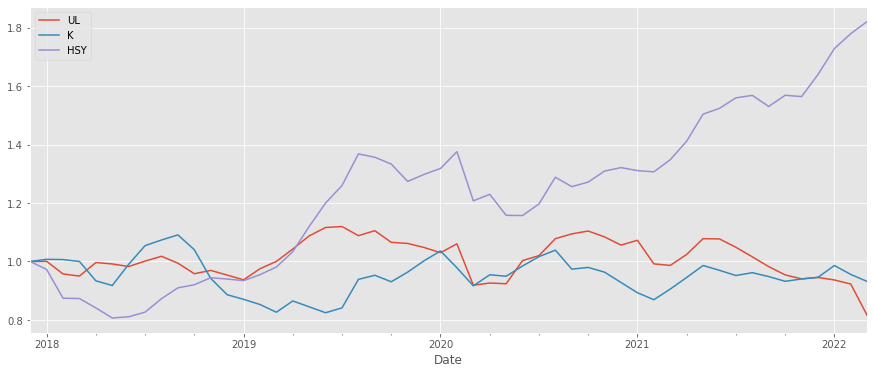

In [31]:
stockAdjustedPrice['UL'].plot(figsize=[15,6], label="UL")
stockAdjustedPrice['K'].plot(figsize=[15,6], label="K")
stockAdjustedPrice['HSY'].plot(figsize=[15,6], label="HSY")
plt.legend(loc="upper left")

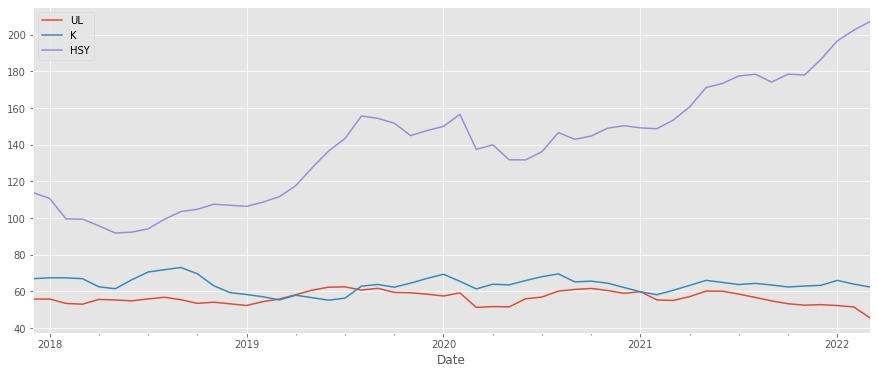

In [14]:
fb.plot(figsize=(15, 6))
plt.show()

--> Hershey rises through the 5 years period, while Unilever and Kellogg stay stable and have a slight decrease at the end

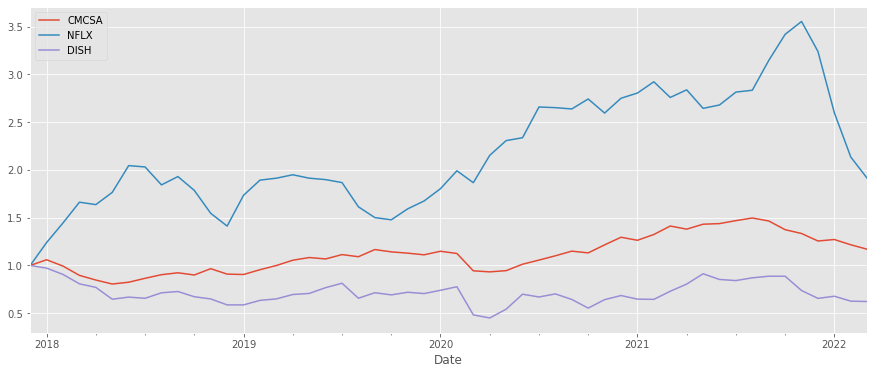

In [32]:
stockAdjustedPrice['CMCSA'].plot(figsize=[15,6], label="CMCSA")
stockAdjustedPrice['NFLX'].plot(figsize=[15,6], label="NFLX")
stockAdjustedPrice['DISH'].plot(figsize=[15,6], label="DISH")
plt.legend(loc="upper left")

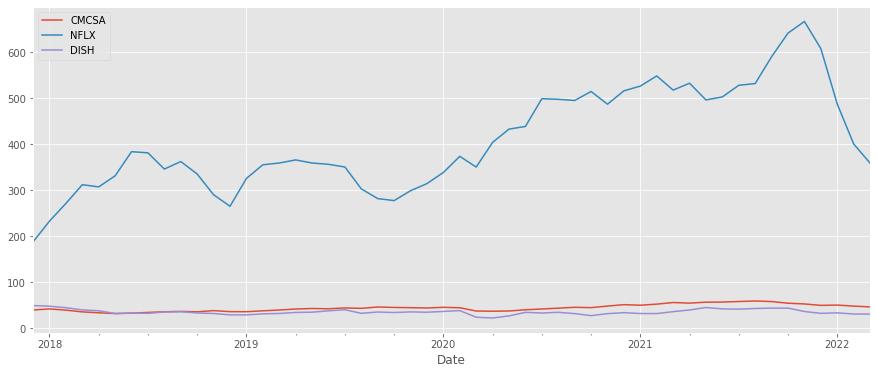

In [15]:
ent.plot(figsize=(15, 6))
plt.show()

--> Netflix seems to be successful but oddly experience a plunge in 2022. (:< Tough competition, losing shows, increasing price. Bless Netflix.) DISH and Comcast have few fluctuations

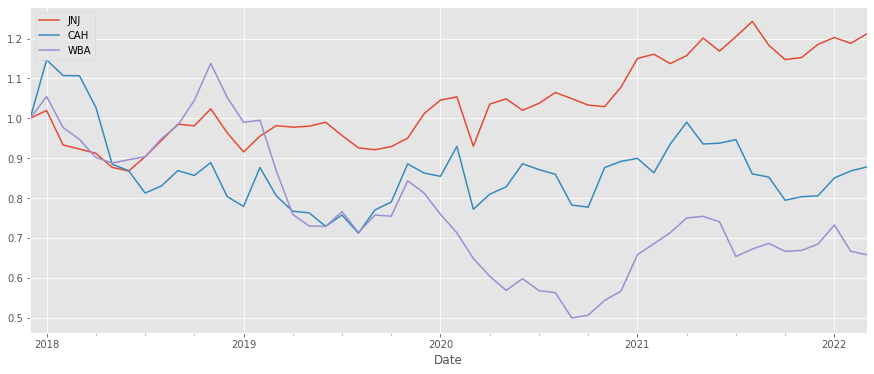

In [33]:
stockAdjustedPrice['JNJ'].plot(figsize=[15,6], label="JNJ")
stockAdjustedPrice['CAH'].plot(figsize=[15,6], label="CAH")
stockAdjustedPrice['WBA'].plot(figsize=[15,6], label="WBA")
plt.legend(loc="upper left")

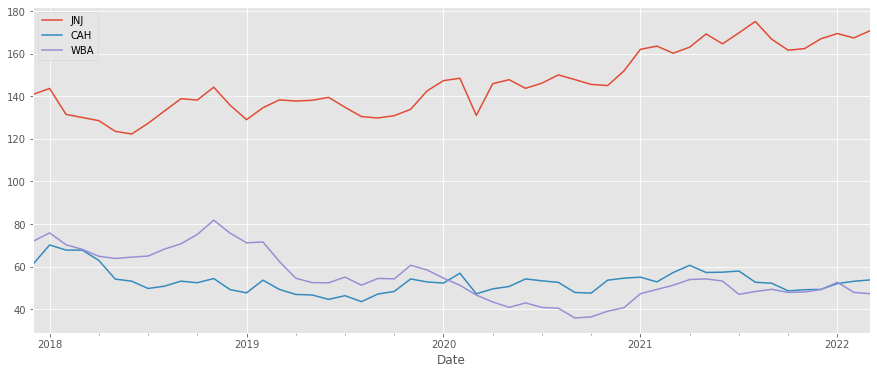

In [16]:
health.plot(figsize=(15, 6))
plt.show()

--> Johnson & Johnson performs best in stocks as it keeps a high price and keeps increasing. On the other hand, Walgreen Boots Alliance has slight decrease through the years, while Cardinal Health stays stable.

# Correlation Rate

In [17]:
tech_corr = tech.corr()
print(tech_corr)

          AAPL      GOOG
AAPL  1.000000  0.946321
GOOG  0.946321  1.000000


In [18]:
fin_corr = fin.corr()
print(fin_corr)

          JPM        MA
JPM  1.000000  0.673527
MA   0.673527  1.000000


In [19]:
fb_corr = fb.corr()
print(fb_corr)

           UL         K       HSY
UL   1.000000 -0.062793 -0.012402
K   -0.062793  1.000000 -0.085617
HSY -0.012402 -0.085617  1.000000


In [20]:
ent_corr = ent.corr()
print(ent_corr)

          CMCSA      NFLX      DISH
CMCSA  1.000000  0.704042  0.395144
NFLX   0.704042  1.000000  0.006992
DISH   0.395144  0.006992  1.000000


In [21]:
health_corr = health.corr()
print(health_corr)

          JNJ       CAH       WBA
JNJ  1.000000  0.095588 -0.483808
CAH  0.095588  1.000000  0.346084
WBA -0.483808  0.346084  1.000000


--> In the stocks chosen, tech and fin have high correlation, ent has some correlation while fb and health have little

--> The more correlation, the less chance fin and tech companies will be chosen at the same time 

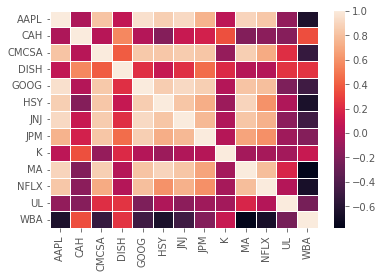

In [22]:
dataplot = sb.heatmap(data.corr(), linewidths=.5)

--> Those whose correlations have darker color (WBA vs MA, AAPL vs WBA...) have higher chance of appearing in the same portfolio

### *Question* When allocating, would the model choose higher price & increasing tickets such as JNJ, or tickets that have least correlations to others but low price and decreasing tickets like WBA?

# Rolling Co-integration

Taken from AAPL analysis, we can infer that stocks having strong correlation may simply because they have non-constant mean. So we're doing rolling cointegration test to see if the stocks have amplifying effect.

      0     1     2     3     4     5     6     7     8     9     10    11  \
0      1  0.99  0.57  0.99  0.41  0.47  0.04  0.92  0.99  0.88  0.33  0.93   
1   0.22     1  0.22   0.0  0.22  0.22  0.23  0.22  0.19  0.22  0.24  0.16   
2   0.01  0.88     1  0.69  0.86   0.0  0.24  0.43  0.86  0.11  0.13  0.94   
3   0.06  0.07  0.01     1  0.01  0.06  0.02   0.0  0.08  0.06  0.06  0.06   
4   0.45  0.72  0.96  0.98     1  0.38  0.04   0.5  0.73  0.64  0.83  0.93   
5   0.43  0.99  0.45  0.96  0.32     1  0.41  0.79  0.99  0.33  0.85  0.95   
6   0.02  0.96  0.62  0.97  0.02  0.55     1  0.43  0.96  0.71   0.1  0.82   
7   0.21   0.6  0.13  0.44  0.09  0.32  0.09     1  0.52  0.22  0.26  0.48   
8   0.02  0.02  0.02  0.11  0.02  0.02  0.02  0.02     1  0.02  0.02  0.02   
9   0.71  0.72  0.16  0.63  0.53  0.43  0.26  0.48  0.77     1  0.09  0.97   
10  0.03  0.65  0.02  0.45   0.2  0.15  0.01  0.24  0.46  0.02     1  0.45   
11  0.36  0.76  0.89  0.56  0.29  0.47  0.39  0.43  0.42  0.63  

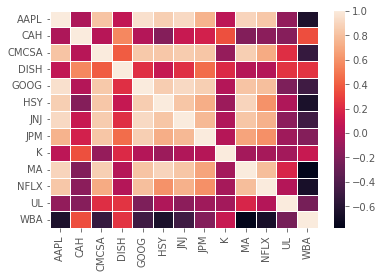

In [23]:
from statsmodels.tsa.stattools import coint

cointArr = []

for x in data:
    for y in data:
        if (x != y):
            t = round(coint(data[x], data[y])[1], 2)
            #print(f'P value between {x} & {y} is {t[1]} \n')
            cointArr.append(t)
        else:
            cointArr.append(1)

cointA = np.array(cointArr, dtype=object)
cointA = cointA.reshape(13, 13)
cointDf = pd.DataFrame(cointA)

cointDf.set_axis(stocks, axis=1)

dataplot = sb.heatmap(data.corr(), linewidths=.5)
print(cointDf)


--> Since most P value is larger than 0.05 significance level, most of the stocks have no cointegration (no amplifying effect).

### Some stocks such as (AAPL & JNJ, NFLX & CMCSA,...) that has cointegration also have high correlation rate. Will this affect the portfolio allocation amount?